# Лабораторная работа №6

## **Исследование искусственного нейрона как базового элемента ИНС.**

**Задание:**

**Часть 1. Программная. Вспомним программирование на Python и немножко ООП**

1. Используя Python и Numpy написать программу реализующую персептрон Розенблатта (т.е. использующий ступенчатую функцию активации)

Основные требования: реализовать в стиле OOП, с методами fit и predict, реализовать как параметр модели возможность первоначальной инициации весов случайным образом либо нулями, реализовать как параметр количество эпох)

Опциональное задание: добавить возможность выбора функции активации (2-3 варианта)


In [22]:
import numpy as np


class PerceptronRosenblatt:
    def __init__(self, weights_init=None, random_state=None,
                 n_epochs=100, activation='step', learning_rate=0.1):
        self.weights_init = weights_init
        self.random_state = random_state
        self.n_epochs = n_epochs
        self.activation = activation
        self.learning_rate = learning_rate

    def fit(self, X, y):
        self._initialize_weights(X)
        if self.activation == 'step':
            self.activation_function = self._step_function
        elif self.activation == 'sigmoid':
            self.activation_function = self._sigmoid_function
        elif self.activation == 'relu':
            self.activation_function = self._relu_function
        else:
            raise ValueError(
                f'Unsupported activation function: {self.activation}')

        self.errors_ = []
        for _ in range(self.n_epochs):
            errors_epoch = self._train_one_epoch(X, y)
            self.errors_.append(errors_epoch)
        return self

    def _initialize_weights(self, X):
        if self.weights_init is None:
            self.weights_init = np.zeros(1 + X.shape[1])
        else:
            np.random.seed(self.random_state)
            self.weights_init = np.random.normal(
                loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.weights_ = np.copy(self.weights_init)

    def _train_one_epoch(self, X, y):
        errors_epoch = 0
        for xi, target in zip(X, y):
            update = self.learning_rate * (target - self.predict(xi))
            self.weights_[1:] += update * xi
            self.weights_[0] += update
            errors_epoch += int(update != 0.0)
        return errors_epoch

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def net_input(self, X):
        return np.dot(X, self.weights_[1:]) + self.weights_[0]

    def _step_function(self, X):
        return np.where(X >= 0, 1, -1)

    def _sigmoid_function(self, X):
        return 1 / (1 + np.exp(-X))

    def _relu_function(self, X):
        return np.maximum(0, X)

2. Применить полученный код для задачи бинарной классификации данных полученных по образцу приведенного кода (тут данные еще и отрисованы).

Рассчитать метрику точности

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 500
data, labels = make_blobs(n_samples=n_samples,
`                             `centers=([1.1, 3], [4.5, 6.9]),
`                             `cluster_std=1.3,
`                             `random_state=0)

colours = ('green', 'orange')
fig, ax = plt.subplots()

for n_class in range(2):
`    `ax.scatter(data[labels==n_class][:, 0],
`               `data[labels==n_class][:, 1],
`               `c=colours[n\_class],
`               `s=50,
`               `label=str(n_class))


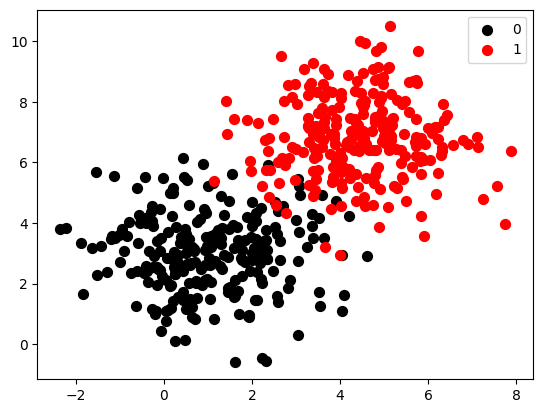

Accuracy: 0.433


In [23]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

n_samples = 500
data, labels = make_blobs(n_samples=n_samples, centers=(
    [1.1, 3], [4.5, 6.9]), cluster_std=1.3, random_state=0)

df = pd.DataFrame(data=data, columns=['x1', 'x2'])
df['labels'] = labels
colours = ('black', 'red')

fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(x=df[df['labels'] == n_class]['x1'],
               y=df[df['labels'] == n_class]['x2'],
               c=colours[n_class], s=50,
               label=str(n_class))

ax.legend()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=.3, random_state=0)

ppn_rosenblatt = PerceptronRosenblatt(n_epochs=200, random_state=0, weights_init=None,
                                      activation='step', learning_rate=0.1)

ppn_rosenblatt.fit(X_train, y_train)

y_pred = ppn_rosenblatt.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')

**Часть 2. Персептрон в Scikit-Learn**

1. Использовать для работы с теми же данными персептрон из пакета Scikit-Learn

from sklearn.linear_model import Perceptron

2. Сравнить полученные результаты.


In [32]:
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC


# Comparison with scikit-learn's Perceptron model
sk_ppn = Perceptron(random_state=0, max_iter=200, eta0=0.1)
sk_ppn.fit(X_train, y_train)
sk_y_pred = sk_ppn.predict(X_test)
sk_accuracy = accuracy_score(y_test, sk_y_pred)
print(f"Accuracy of scikit-learn's Perceptron model: {sk_accuracy:.3f}")
print(
    f'Accuracy of our Perceptron model: {accuracy_score(y_test, y_pred):.3f}')

Accuracy of scikit-learn's Perceptron model: 0.980
Accuracy of our Perceptron model: 0.433


Использовать модель из п.3 для работы с датасетом Iris взяв оттуда последние 100 записей. Сравнить полученные результаты с помощью персептрона и метода SVN


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn import svm
from sklearn.datasets import load_iris


# Load iris dataset
iris = load_iris()
X = iris.data[-100:, :2]
y = iris.target[-100:]

# Train perceptron model
ppn = Perceptron()
ppn.fit(X, y)
ppn_acc = ppn.score(X, y)

# Train SVM model
svm_ = svm.SVC(kernel='linear')
svm_.fit(X, y)
svm_acc = svm_.score(X, y)

# Train our Perceptron model
ppn_rosenblatt = PerceptronRosenblatt(n_epochs=200, random_state=0, weights_init=None,
                                      activation='step', learning_rate=0.1)
ppn_rosenblatt.fit(X, y)
ppn_rosenblatt_acc = accuracy_score(y, ppn_rosenblatt.predict(X))

# Print model accuracies
print(f"Scikit-learn's Perceptron accuracy: {ppn_acc}")
print(f"Linear SVM accuracy: {svm_acc}")
print(f"Our Perceptron accuracy: {ppn_rosenblatt_acc}")

Scikit-learn's Perceptron accuracy: 0.5
Linear SVM accuracy: 0.73
Our Perceptron accuracy: 0.5
